# 6.13.1 Cálculos de los discos y arandelas de sección constante sujetos a un estado de tensiones axisimétrico

In [1]:
from sympy import init_printing, latex, symbols, diff, Function, dsolve, simplify, solve, expand, factor, Eq

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se definen las variables:

In [2]:
r  = symbols('r')
ur = Function('u_r')(r)

# propiedades del material
E, nu, G, rho = symbols('E, nu, G, rho')

# la velocidad angular
omega = symbols('omega')

Si la arandela gira con una velocidad angular $\omega$, entonces la fuerza másica corresponde a $b_r = \rho \omega^2 r$:

In [3]:
br = rho*omega**2*r

Las deformaciones se relacionan con los desplazamientos mediante:
\begin{align}
   \varepsilon_r(r)      &= \frac{\operatorname{d} u_r(r)}{\operatorname{d} r} & 
   \varepsilon_\theta(r) &= \frac{u_r(r)}{r}                                   & 
   \varepsilon_z(r)      &= 0  \\
   \gamma_{r\theta}(r)   &= 0   &
   \gamma_{r z}(r)       &= 0   &
   \gamma_{\theta z}(r)  &= 0
\end{align}

In [4]:
er  = diff(ur, r)
et  = ur/r

Calculamos los esfuerzos a partir de las deformaciones utilizando la ley de Hooke para tensión plana:
\begin{align}
\sigma_r        &= \frac{E}{1-\nu^2} \left(\varepsilon_r + \nu \varepsilon_\theta \right) &
\sigma_\theta   &= \frac{E}{1-\nu^2} \left(\varepsilon_\theta + \nu \varepsilon_r \right) &
\sigma_z        &= 0 \\
\tau_{r\theta}  &= G \gamma_{r\theta} &
\tau_{rz}       &= 0 &
\tau_{\theta z} &= 0.
\end{align}

In [5]:
sr = (E/(1 - nu**2))*(er + nu*et)
st = (E/(1 - nu**2))*(et + nu*er)

Recordemos que la ecuación diferencial de equilibrio para el caso polar + axisimétrico (caso 3) es:
$$
 \frac{\operatorname{d}\! \sigma_r}{\operatorname{d}\! r} + \frac{\sigma_r - \sigma_\theta}{r} + b_r = 0
$$

In [6]:
eq = simplify(diff(sr, r) + (sr-st)/r + br) # == 0

imprimir("", eq, " = 0")

<IPython.core.display.Math object>

es decir,

In [7]:
eq = simplify((-r**2*(nu**2 - 1)/E)*eq)

imprimir("", eq, " = 0")

<IPython.core.display.Math object>

Esta es una ecuación diferencial de Cauchy-Euler. Procedemos a resolver dicha ecuación diferencial:

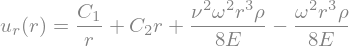

In [8]:
sol = dsolve(eq, ur).expand()

sol

Observe que las constantes quedaron diferentes a como están en el libro, por lo que toca organizarlas:

In [9]:
C1, C2, C3 = symbols('C1, C2, C3')
sol = sol.subs({C1:C3, C2:C1, C3:C2})
ur  = sol.rhs

In [10]:
imprimir("u_r(r) = ", ur)

<IPython.core.display.Math object>

Calculamos las deformaciones a partir de los desplazamientos:
\begin{align}
   \varepsilon_r(r)      &= \frac{\operatorname{d} u_r(r)}{\operatorname{d} r} & 
   \varepsilon_\theta(r) &= \frac{u_r(r)}{r}                                   & 
   \varepsilon_z(r)      &= 0  \\
   \gamma_{r\theta}(r)   &= 0   &
   \gamma_{r z}(r)       &= 0   &
   \gamma_{\theta z}(r)  &= 0
\end{align}

In [11]:
er  = expand(diff(ur, r))
et  = expand(ur/r)
grt = 0

In [12]:
imprimir(r"\varepsilon_r(r) = ", er)

<IPython.core.display.Math object>

In [13]:
imprimir(r"\varepsilon_\theta(r) = ", et)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\gamma_{r\theta}(r) = ", grt)

<IPython.core.display.Math object>

Calculamos los esfuerzos a partir de las deformaciones utilizando la ley de Hooke para tensión plana:
\begin{align}
\sigma_r        &= \frac{E}{1-\nu^2} \left(\varepsilon_r + \nu \varepsilon_\theta \right) &
\sigma_\theta   &= \frac{E}{1-\nu^2} \left(\varepsilon_\theta + \nu \varepsilon_r \right) &
\sigma_z        &= 0 \\
\tau_{r\theta}  &= G \gamma_{r\theta} &
\tau_{rz}       &= 0 &
\tau_{\theta z} &= 0.
\end{align}

In [15]:
sr  = E/(1 - nu**2)*(er + nu*et)
st  = E/(1 - nu**2)*(et + nu*er)
trt = G*grt

In [16]:
imprimir(r"\sigma_r(r) = ", sr)

<IPython.core.display.Math object>

In [17]:
imprimir(r"\sigma_\theta(r) = ", st)

<IPython.core.display.Math object>

In [18]:
imprimir(r"\tau_{r\theta}(r) = ", trt)

<IPython.core.display.Math object>

Para encontrar las constantes de integración $C_1$ y $C_2$ debemos tener en cuenta las condiciones de frontera. En particular analizaremos los siguientes casos:
* Caso 1: El disco está sujeto a unas presiones $p_i$ y $p_e$ en su radio interior $r_i$ y exterior $r_e$.
* Caso 2: El disco no cuenta con un hueco interior y solo está sujeto a una presión $p_e$ en su radio exterior $r_e$.

## Caso 1: el disco está sujeto a unas presiones $p_i$ y $p_e$ en su radio interior $r_i$ y exterior $r_e$

En este caso, las condiciones de frontera son:
\begin{align}
\sigma_r(r_i) &= -p_i & \sigma_r(r_e) &= -p_e.
\end{align}

Procedemos a calcular las constantes de integración:

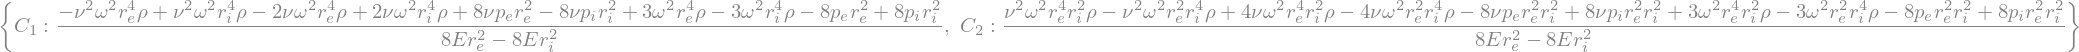

In [19]:
ri, re, pi, pe = symbols('r_i, r_e, p_i, p_e')

sol = solve([ Eq(sr.subs(r,ri), -pi),
              Eq(sr.subs(r,re), -pe) ], [C1, C2])

sol

In [20]:
imprimir("C_1 = ", sol[C1].factor())

<IPython.core.display.Math object>

In [21]:
imprimir("C_2 = ", sol[C2].factor())

<IPython.core.display.Math object>

En el caso particular que la velocidad angular $\omega$ del disco sea cero, las constantes anteriores se reducen a:

In [22]:
imprimir("C_1 = ", sol[C1].subs(omega, 0).factor())

<IPython.core.display.Math object>

In [23]:
imprimir("C_2 = ", sol[C2].subs(omega, 0).factor())

<IPython.core.display.Math object>

y por lo tanto, los esfuerzos al interior del disco estarían dados por:

In [24]:
imprimir(r"\sigma_r(r) = ", sr.subs(sol).subs(omega, 0).factor())

<IPython.core.display.Math object>

In [25]:
imprimir(r"\sigma_\theta(r) = ", st.subs(sol).subs(omega, 0).factor())

<IPython.core.display.Math object>

Finalmente, si la velocidad angular $\omega$ del disco es cero, el desplazamiento radial de la arandela estaría dado por:

In [26]:
imprimir(r"u_r(r) = ", ur.subs(sol).subs(omega, 0).factor())

<IPython.core.display.Math object>

## Caso 2: el disco no cuenta con un hueco interior y solo está sujeto a una presión $p_e$ en su radio exterior $r_e$

En este caso, en el eje del disco ($r=0$) no existen desplazamientos y por lo tanto, las condiciones de frontera se convierten en:
\begin{align}
   u_r(0)        &= 0     &
   \sigma_r(r_e) &= -p_e.
\end{align}

Recordemos que los desplazamientos son:

In [27]:
imprimir(r"u_r(r) = ", ur)

<IPython.core.display.Math object>

Procedemos a calcular las constantes de integración:

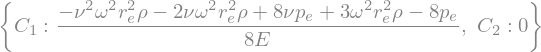

In [28]:
sol = solve([ Eq(ur.subs(r,0), 0),
              Eq(sr.subs(r,re), -pe) ], [C1, C2])

sol

In [29]:
imprimir("C_1 = ", sol[C1].factor())

<IPython.core.display.Math object>

In [30]:
imprimir("C_2 = ", sol[C2].factor())

<IPython.core.display.Math object>

Es obvio que en este caso $C_2 = 0$, porque de lo contrario tendríamos desplazamientos infinitos $u_r$ para $r=0$, lo cual es físicamente imposible.

En el caso particular que la velocidad angular $\omega$ del disco sea cero, las constantes anteriores se reducen a:

In [31]:
imprimir("C_1 = ", sol[C1].subs(omega, 0).factor())

<IPython.core.display.Math object>

In [32]:
imprimir("C_2 = ", sol[C2].subs(omega, 0).factor())

<IPython.core.display.Math object>

y por lo tanto, los esfuerzos al interior del disco estarían dados por:

In [33]:
imprimir(r"\sigma_r(r) = ", sr.subs(sol).subs(omega,0).factor())

<IPython.core.display.Math object>

In [34]:
imprimir(r"\sigma_\theta(r) = ", st.subs(sol).subs(omega,0).factor())

<IPython.core.display.Math object>

es decir, se obtiene una distribución igual de esfuerzos normales a compresión de magnitud $p_e$ en todos los puntos de dicho disco y en todas las direcciones de su plano.